In [ ]:
# import library and data
# remove missing value
# split it
# transform it
# train and buit a model
# evaluate model
# plot a graph

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/HousingData.csv')

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
# pip install --user matplotlib


In [ ]:
df.isnull().sum()


,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [ ]:
df["CRIM"] = df['CRIM'].fillna(df['CRIM'].mean())
df["ZN"] = df['ZN'].fillna(df['ZN'].mean())
df["INDUS"] = df['INDUS'].fillna(df['INDUS'].mean())
df["CHAS"] = df['CHAS'].fillna(df['CHAS'].mean())
df["AGE"] = df['AGE'].fillna(df['AGE'].mean())
df["LSTAT"] = df['LSTAT'].fillna(df['LSTAT'].mean())

In [ ]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
x = df.drop("MEDV" , axis = 1)
y = np.array(df['MEDV']).reshape(-1,1)
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
pre_model = MinMaxScaler( )
x_train_scaled = pre_model.fit_transform(x_train)
x_test_scaled = pre_model.transform(x_test)

pre_model_y = MinMaxScaler( )
y_train_scaled = pre_model_y.fit_transform(y_train)
y_test_scaled = pre_model_y.transform(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add( Dense(256, activation = "relu"))
model.add( Dense(64, activation = "relu"))
model.add( Dense(8, activation = "relu"))
model.add( Dense(1, activation = "linear"))
model.compile(loss = "mse" , optimizer= "adam")

In [ ]:
model.fit(x_train_scaled, y_train_scaled , epochs = 100 , batch_size = 4)

Epoch 1/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0267
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0124
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0086
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0100
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078
Epoch 8/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0088
Epoch 9/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0078
Epoch 10/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084
Epoch 11/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068
Epoch 12/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069
Epoch 13/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073
Epoch 14/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059
Epoch 15/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0070
Epoc

In [ ]:
# evaluate
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [ ]:
y_pred = model.predict(x_test_scaled);

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [ ]:
y_pred_inverse = pre_model_y.inverse_transform(y_pred)
y_test_inverse = pre_model_y.inverse_transform(y_test_scaled)

In [ ]:
print(mean_squared_error(y_pred_inverse, y_test_inverse))
print(mean_absolute_error(y_pred_inverse, y_test_inverse))

7.140425044590505
1.9595607637420416


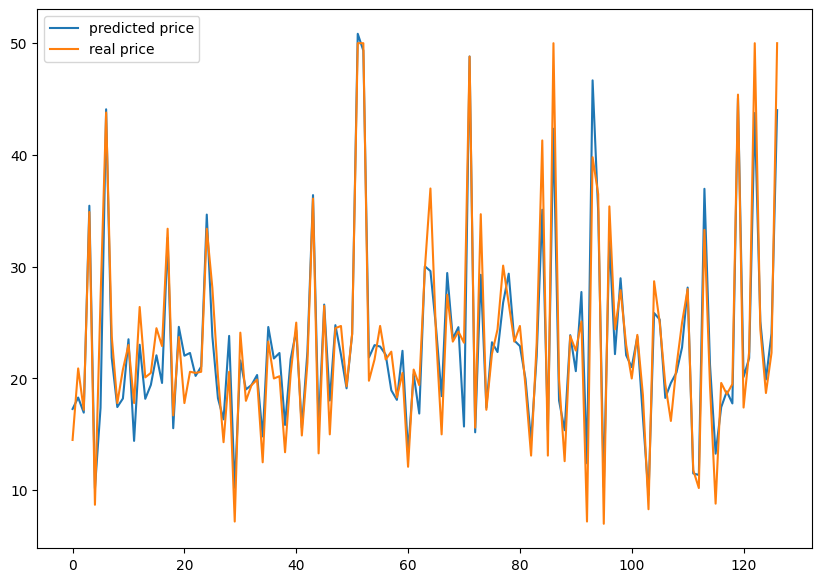

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(y_pred_inverse , label="predicted price")
plt.plot(y_test_inverse , label="real price")
plt.legend()
plt.show()